In [41]:
import pandas as pd
uselog=pd.read_csv('./pyda100-master/4장/use_log.csv')
uselog.isnull().sum()
customer=pd.read_csv('./pyda100-master/4장/customer_join.csv')
customer.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

In [51]:
##클러스터링을 통한 회원을 그룹화

customer_clustering=customer[["mean","median","max","min","membership_period"]]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
customer_clustering_sc=sc.fit_transform(customer_clustering)

kmeans=KMeans(n_clusters=4, random_state=0)
clusters=kmeans.fit(customer_clustering_sc)
customer_clustering["cluster"]=clusters.labels_
print(customer_clustering["cluster"].unique())
customer_clustering.head()

[3 0 1 2]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,월평균값,월중앙값,월최댓값,월최솟값,회원기간,cluster
0,4.833333,5.0,8,2,47,3
1,5.083333,5.0,7,3,47,3
2,4.583333,5.0,6,3,47,3
3,4.833333,4.5,7,2,47,3
4,3.916667,4.0,6,1,47,3


In [59]:
customer_clustering.columns=["월평균값","월중앙값","월최댓값","월최솟값","회원기간","cluster"]
customer_clustering.groupby("cluster").count()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,771,771,771,771,771
1,1332,1332,1332,1332,1332
2,841,841,841,841,841
3,1248,1248,1248,1248,1248


In [60]:
customer_clustering.groupby("cluster").mean()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,3.065504,2.900130,4.783398,1.649805,9.276265
1,5.537658,5.388889,8.753754,2.702703,14.876126
2,8.061076,8.046373,10.015458,6.171225,7.027348
3,4.677436,4.671074,7.233173,2.153045,36.925481


In [61]:
from sklearn.decomposition import PCA
X= customer_clustering_sc
pca=PCA(n_components=2)
pca.fit(X)

x_pca=pca.transform(X)
pca_df=pd.DataFrame(x_pca)
pca_df["cluster"]=customer_clustering["cluster"]

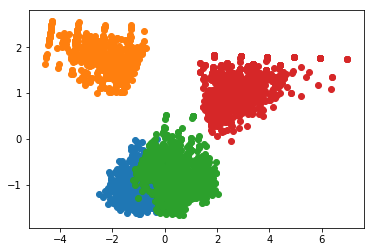

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in customer_clustering["cluster"].unique():
    tmp=pca_df.loc[pca_df["cluster"]==i]
    plt.scatter(tmp[0],tmp[1])

In [63]:
customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47
5,IK271057,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,3.750000,3.5,5,2,1,2019-04-30,47
6,HI324666,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,3.916667,3.5,7,2,1,2019-04-30,47
7,AS647421,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.500000,4.0,9,2,1,2019-04-30,47
8,AS069821,XXXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,4.083333,3.5,7,2,1,2019-04-30,47
9,GD039425,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.666667,4.5,7,3,1,2019-04-30,47


In [64]:
customer_clustering=pd.concat([customer_clustering, customer], axis=1)
customer_clustering.groupby(["cluster","is_deleted"],as_index=False).count()[["cluster","is_deleted","customer_id"]]

,cluster,is_deleted,customer_id
0,0,1,771
1,1,0,790
2,1,1,542
3,2,0,822
4,2,1,19
5,3,0,1230
6,3,1,18


In [65]:
customer_clustering.groupby(["cluster","routine_flg"],as_index=False).count()[["cluster","routine_flg","customer_id"]]

,cluster,routine_flg,customer_id
0,0,0,499
1,0,1,272
2,1,0,226
3,1,1,1106
4,2,0,52
5,2,1,789
6,3,0,2
7,3,1,1246


In [67]:
uselog["usedate"]=pd.to_datetime(uselog["usedate"])
uselog["연월"]=uselog["usedate"].dt.strftime("%Y%m")
uselog_months=uselog.groupby(["연월","customer_id"],as_index=False).count()
uselog_months.rename(columns={"log_id":"count"},inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [71]:
year_months =list(uselog_months["연월"].unique())
predict_data=pd.DataFrame()
for i in range(6, len(year_months)):
    tmp=uselog_months.loc[uselog_months["연월"]==year_months[i]]
    tmp.rename(columns={"count":"count_pred"},inplace=True)
    for j in range(1,7):
        tmp_before=uselog_months.loc[uselog_months["연월"]==year_months[i-j]]
        del tmp_before["연월"]
        tmp_before.rename(columns={"count":"count_{}".format(j-1)},inplace=True)
        tmp=pd.merge(tmp,tmp_before,on="customer_id",how="left")
    predict_data=pd.concat([predict_data,tmp],ignore_index=True)
predict_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0


In [72]:
predict_data=predict_data.dropna()
predict_data=predict_data.reset_index(drop=True)
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0


In [73]:
predict_data=pd.merge(predict_data,customer[["customer_id","start_date"]],on="customer_id",how="left")
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01


In [76]:
predict_data["now_date"]=pd.to_datetime(predict_data["연월"],format="%Y%m")
predict_data["start_date"]=pd.to_datetime(predict_data["start_date"])
from dateutil.relativedelta import relativedelta
predict_data["period"]=None
for i in range(len(predict_data)):
    delta=relativedelta(predict_data["now_date"][i],predict_data["start_date"][i])
    predict_data["period"][i]=delta.years*12+delta.months
predict_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,23
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12


In [79]:
predict_data= predict_data.loc[predict_data["start_date"]>=pd.to_datetime("20180401")]

from sklearn import linear_model
import sklearn.model_selection
model=linear_model.LinearRegression()
X=predict_data[["count_0","count_1","count_2","count_3","count_4","count_5","period"]]
y=predict_data["count_pred"]
X_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
print(model.score(X_train,y_train))
print(model.score(x_test,y_test))

0.6036918707457328
0.619434145468649


In [82]:
coef=pd.DataFrame({"feature_names":X.columns,"coefficient":model.coef_})
coef

,feature_names,coefficient
0,count_0,0.325960
1,count_1,0.201883
2,count_2,0.157614
3,count_3,0.174999
4,count_4,0.102677
5,count_5,0.066157
6,period,0.071905


In [83]:
x1=[3,4,4,6,8,7,8,]
x2=[2,2,3,3,4,6,8]
x_pred=[x1,x2]

In [84]:
model.predict(x_pred)

array([3.8684631 , 1.97925961])